In [1]:
import os 
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DIR = "../input/20201115at/"
os.listdir(DIR)

['campaign.csv',
 'train.csv',
 'advertiser_video.csv',
 'map_game_feed_native_video_assets.csv',
 'advertiser_converted_video.csv',
 'atmaCup7__sample_submission.csv',
 'test.csv']

In [3]:
train = pd.read_csv(DIR+"train.csv")
test = pd.read_csv(DIR+"test.csv")
video = pd.read_csv(DIR+"advertiser_video.csv")

# train & test

In [4]:
train.head()

,request_id,imp_at,target,adnw_id,adspot_id,adspot_video_format_id,advertiser_id,app_id,auction_type_id,campaign_id,...,last_paid_interval,login_frequency,max_login_interval,media_app_id,os,os_version,pos,uid,user_type_id,video_template_id
0,ad6a7b7894f142d81a1e,2020-04-28 00:04:14.639000,0,4,1111,2.0,1b29c3959fc76425d130,efef8f05c293786ae95d,1.0,9ce932d55f27ed28f0e5,...,29835.0,10.0,2607.0,NaN,1,13.3.1,0,30cfce348022c3812b3a,1,a96538aec6d5d90fd8d9
1,ac8453e4a93391812b78,2020-04-28 00:09:13.759000,0,28,1081,2.0,ba2bb260d8eccd0057a4,85518c203c727a6fcd6e,2.0,23f7cf2bddc97c599ac4,...,159596.0,2.0,13540.0,c3292411366546db2194,2,9.0.0,1,4c28854cab6a85c37dab,2,297ade72d5f1e9ed6e2f
2,4959adca0d9284e642c9,2020-04-28 00:09:14.708000,0,42,1123,3.0,0aaa2635cef6c96c7932,d01b84105c697315f36d,1.0,2dde952bf6521fac0b71,...,156643.0,9.0,33725.0,07514730ff1e69100233,1,12.1.2,0,b35f0cd7210c4273489c,1,NaN
3,622c44ebc7cf591d046e,2020-04-28 00:10:40.291000,0,8,1113,2.0,1ed4e5bb950da757976a,c72faf7a97213d7e4c8c,1.0,1cbbcb2f33a045e5a09c,...,NaN,4.0,7377.0,84a2cff85228c12b0e6a,1,13.4.1,0,57dc1bf69be06dac416c,1,b5401899f2db8ce48d43
4,3093c6746ae6e35b9ad5,2020-04-28 00:11:45.895000,0,22,1061,NaN,d352ebd3462849796754,0376415068bf3e5b9e95,4.0,84095859da9cffce1c60,...,1566749.0,5.0,164759.0,2fd1c330d5a47edc039b,1,12.4.5,0,7ca7b54b97093b084027,1,NaN


In [5]:
test.head()

,request_id,imp_at,adnw_id,adspot_id,adspot_video_format_id,advertiser_id,app_id,auction_type_id,campaign_id,category_id,...,last_login_interval,login_frequency,max_login_interval,media_app_id,os,os_version,pos,uid,user_type_id,video_template_id
0,9747ce53a3cb6b71083d,2020-06-27 00:04:19.064000,26,1069,3.0,f18c256a442a34e0b415,e2e4c7033fd8b771cbc9,1.0,68bf8df385e56d7c7224,0,...,18279.0,1,31684.0,1dd7e16fec6017fdc4cc,1,13.5.1,1,d88dff8c67cbca5063b6,1,NaN
1,688ca2024829c392a509,2020-06-27 00:11:59.392000,28,1081,1.0,1ed4e5bb950da757976a,39b1641c9aee267d6c8c,2.0,0b4017d3f3113de38ba6,0,...,12665.0,1,224419.0,08c200079eb692fd93b8,2,8.0.0,1,ecb26d89e786f4710c62,2,69b22b4400be9d91e6cc
2,b0b8044a2428958ac17b,2020-06-27 00:14:09.341000,28,1081,2.0,5b843a28e245912f51ca,483c546765bd610ab0e3,2.0,985dfa150be554b1714d,0,...,7521.0,5,16301.0,0860cd60ba0f3eef24d8,2,10.0.0,1,85e9de3b175557cf577f,2,297ade72d5f1e9ed6e2f
3,6b9bb6e4f70cad3a629a,2020-06-27 00:18:08.399000,27,1073,3.0,1ed4e5bb950da757976a,65235845da2e07e67145,1.0,b3857c6735bc69ea932d,0,...,64583.0,8,2701.0,43b7a628b6db774cc045,2,5.0.2,0,0bba4196f93ca1cdbc22,2,NaN
4,07234a3c7389cc36bc0e,2020-06-27 00:23:18.583000,26,1069,3.0,1a71092d4f938588d1fd,c542bacba91a6b4b595f,1.0,8da6c586bd1089956477,8305,...,35453.0,1,53622.0,d0eab9db52e426309036,2,9,1,947fc17776732f10cc9e,2,NaN


In [6]:
train.shape, test.shape

((1997595, 35), (390095, 30))

In [7]:
set(train.columns) - set(test.columns)

{'click_or_view_at',
 'cv_at',
 'last_cv_interval',
 'last_paid_interval',
 'target'}

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997595 entries, 0 to 1997594
Data columns (total 35 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   request_id               object 
 1   imp_at                   object 
 2   target                   int64  
 3   adnw_id                  int64  
 4   adspot_id                int64  
 5   adspot_video_format_id   float64
 6   advertiser_id            object 
 7   app_id                   object 
 8   auction_type_id          float64
 9   campaign_id              object 
 10  category_id              int64  
 11  click_or_view_at         object 
 12  country_code             object 
 13  cv_at                    object 
 14  first_login_interval     float64
 15  frequency                int64  
 16  from_click               int64  
 17  game_feed_asset_type_id  int64  
 18  game_feed_id             object 
 19  game_template_id         object 
 20  header_bidding           float64
 21  is_inter

In [9]:
train.isnull().sum()

request_id                       0
imp_at                           0
target                           0
adnw_id                          0
adspot_id                        0
adspot_video_format_id      191548
advertiser_id                    0
app_id                       55492
auction_type_id              13367
campaign_id                      0
category_id                      0
click_or_view_at                 0
country_code                   844
cv_at                            0
first_login_interval           479
frequency                        0
from_click                       0
game_feed_asset_type_id          0
game_feed_id                     0
game_template_id           1170226
header_bidding              816537
is_interstitial             645181
item_id                    1337766
last_cv_interval           1961438
last_login_interval            479
last_paid_interval         1145927
login_frequency                 69
max_login_interval           29962
media_app_id        

In [10]:
test.isnull().sum()

request_id                      0
imp_at                          0
adnw_id                         0
adspot_id                       0
adspot_video_format_id      41261
advertiser_id                   0
app_id                      14112
auction_type_id              1516
campaign_id                     0
category_id                     0
country_code                  526
first_login_interval          337
frequency                       0
from_click                      0
game_feed_asset_type_id         0
game_feed_id                    0
game_template_id           204050
header_bidding             219817
is_interstitial            147102
item_id                    234040
last_login_interval           337
login_frequency                 0
max_login_interval           7529
media_app_id                14783
os                              0
os_version                      4
pos                             0
uid                             0
user_type_id                    0
video_template

## request_id

In [11]:
print(len(train.request_id.unique()), len(test.request_id.unique())) # 全て独自のid
set(train.request_id.unique()) & set(test.request_id.unique()) # request_idに被りなし

1997595 390095


set()

## imp_at

In [12]:
set(train.imp_at.unique()) & set(test.imp_at.unique()) # request_idに被りなし

set()

In [13]:
train.imp_at

0          2020-04-28 00:04:14.639000
1          2020-04-28 00:09:13.759000
2          2020-04-28 00:09:14.708000
3          2020-04-28 00:10:40.291000
4          2020-04-28 00:11:45.895000
                      ...            
1997590    2020-05-28 23:58:55.869000
1997591    2020-05-28 23:59:06.339000
1997592    2020-05-28 23:59:15.434000
1997593    2020-05-28 23:59:15.506000
1997594    2020-05-28 23:59:18.281000
Name: imp_at, Length: 1997595, dtype: object

In [14]:
test.imp_at

0         2020-06-27 00:04:19.064000
1         2020-06-27 00:11:59.392000
2         2020-06-27 00:14:09.341000
3         2020-06-27 00:18:08.399000
4         2020-06-27 00:23:18.583000
                     ...            
390090    2020-07-04 23:58:27.897000
390091    2020-07-04 23:58:31.012000
390092    2020-07-04 23:58:37.502000
390093    2020-07-04 23:58:41.421000
390094    2020-07-04 23:59:03.483000
Name: imp_at, Length: 390095, dtype: object

# uid

In [15]:
train.uid.value_counts()

d429410d7af75ca0fe20    339
5eabd714187e3e56f39f    233
14c3e5840f048fdfa431    180
a1086428fa3823aeaa11    165
a363c0b305891a581241    150
                       ... 
802cf7a6195d44973229      1
b84a175677b813b2fd0d      1
04be65e05aa2db468771      1
6cd97b2399c2720dbd53      1
57b7d6219a218efd6e2b      1
Name: uid, Length: 1215039, dtype: int64

In [16]:
test.uid.value_counts()

14c3e5840f048fdfa431    51
56927e802648d92c13a9    51
446e66391de0ac590e1c    37
01debb312ed105fa3226    34
18476a1c1d70ab549965    34
                        ..
65f335bb252aae179ba1     1
d1c0cacf03960cd86319     1
488229fbc1d65548f02e     1
24eac97d258a1b1a47a6     1
2dca0e11291cc5dbcfcd     1
Name: uid, Length: 327517, dtype: int64

In [17]:
set(train.uid.unique()) - set(test.uid.unique())

{'98259f4ae9ac71100939',
 '336f99c8dbaf4a55b18f',
 '7e3d301324548202adb5',
 'aef30408113d8d05f511',
 '0af65f15a1a12e862dba',
 '88540cf89ff09b0d52f3',
 'ce0c094750df1e51dc6c',
 '0ca2f95dd47facc89123',
 '16cda96b3fe9cb793613',
 '5a929858cedb3c7c40c6',
 'a279cc8b7c68c14687f3',
 'd99dd362448702c1cc80',
 '235e2b66c216bee8fb28',
 '7ce8645219d46a1953a9',
 'f1366ba034f0bfd16256',
 '1b27d9d3002607bfc2ac',
 'cb67a296d6cc4678108f',
 'cecd1d224eb95bf35e1e',
 '3183a9de837b2961e31f',
 '0a59c520c32d3a699d03',
 '93bcfa8ee22c09579354',
 'cc657cabeba5bf99473f',
 'b4d3f4b1358adf3a36ba',
 '97be13ab176318a453a5',
 '4499f9699fe06db34d49',
 'd0ee206545b1ce649257',
 '8ea2ed16f22460ae56c3',
 '86bc434fa474a1a11705',
 'a9bdfa98d7304e1fa420',
 'da16d69ae74975973baa',
 '56fc7709e7716059422f',
 'cc6323446d5d1e12eef6',
 'a3181c04e80dec8df564',
 '960d63833288c5cefade',
 'b7542d0df5896e0f5026',
 'e66080dcbd3dea70302e',
 'fad51edbf852fe092034',
 '107c0ef870fd8bc22cfc',
 '65f220431a3f4ebf05f7',
 'cceeea7eee30e09f137a',


# video

In [18]:
video = video.rename(columns = {"mst_advertiser_id":"advertiser_id"})
video.head()

,id,advertiser_id,duration,width,height,file_size
0,00007c2cea6e8b84d25a,d352ebd3462849796754,15,1280,720,19450664.0
1,000217bb188dbc73a605,6896e5bce9d6be22b717,14,1280,720,18781163.0
2,0004b0f4631bf87421d7,8f4b5b2cc6cb4d1c8121,15,1280,720,19601616.0
3,0005ddab6abfd46c11e4,8802554240c3fafa905f,27,1280,720,33344533.0
4,001066f3b8b218ee0125,e89f02f0e8e333b10661,11,720,1280,10265222.0


In [19]:
video.describe()

,duration,width,height,file_size
count,11707.000000,11707.000000,11707.000000,1.161900e+04
mean,15.371316,1424.328863,925.809687,2.284601e+07
std,6.381374,376.574710,275.882977,1.961414e+07
min,2.000000,272.000000,270.000000,5.723770e+05
25%,11.000000,1280.000000,720.000000,1.240209e+07
50%,15.000000,1280.000000,720.000000,1.859766e+07
75%,18.000000,1920.000000,1080.000000,2.494706e+07
max,56.000000,2200.000000,1920.000000,2.079454e+08


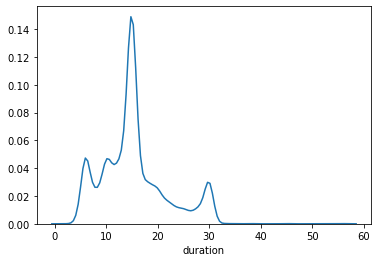

In [20]:
sns.distplot(video.duration, hist=False)

# data merge

In [21]:
# メモリオーバーとなる。。
#train = train.merge(video, on="advertiser_id", how="left")
#test = test.merge(video, on="advertiser_id", how="left")